In [1]:
import os
import numpy as np
import yaml
import matplotlib.pyplot as plt
import cuvis
from cuvis_ai.preprocessor import PCA, NMF
from cuvis_ai.pipeline import Graph
from cuvis_ai.unsupervised import KMeans
import networkx as nx
%matplotlib inline

In [2]:
graph = Graph('tomato_net')

0.0.1


In [3]:
# Load a sample image
data = cuvis.SessionFile('C:\Measurements\Botanic_garden_2\Auto_001.cu3s').get_measurement(0)
sample_cube = data.data.get('cube').array

In [4]:
# Stage 1 - Dimensionality Reduction
pca_stage = PCA(n_components=100)
pca_stage.fit(sample_cube)
out = pca_stage.forward(sample_cube)

In [5]:
# Stage 2 - Dimensionality Reduction (Redundanct, but included for example)
pca_stage2 = PCA(n_components=10)
pca_stage2.fit(out)
out2 = pca_stage2.forward(out)

In [6]:
# Stage 3 - Upsupervised classification
kmeans_stage = KMeans(n_clusters=4)
kmeans_stage.fit(out2)

In [7]:
# Stage 4 - Upsupervised classification on higher dim data
kmeans_stage2 = KMeans(n_clusters=4)
kmeans_stage2.fit(out)

In [8]:
graph.add_base_node(pca_stage)

In [9]:
graph.add_edge(pca_stage, pca_stage2)

In [10]:
graph.add_edge(pca_stage2, kmeans_stage)

In [11]:
graph.add_edge(pca_stage, kmeans_stage2)

In [12]:
out = graph.forward(sample_cube)

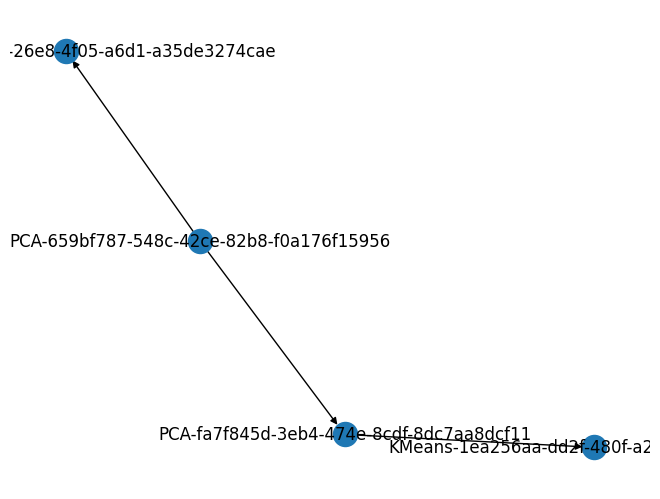

In [13]:
nx.draw(graph.graph, with_labels = True)

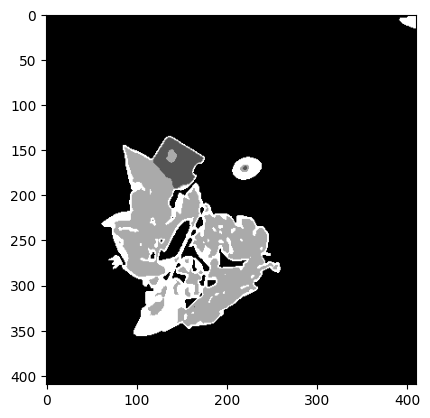

In [14]:
plt.figure()
plt.imshow(list(out.values())[-1], cmap='grey')
plt.show()

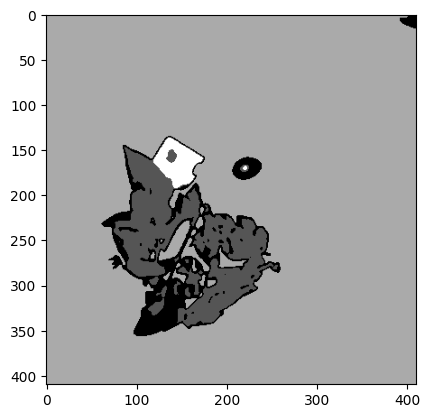

In [15]:
plt.figure()
plt.imshow(list(out.values())[-2], cmap='grey')
plt.show()

In [16]:
graph.serialize()

Project saved to ~/tomato_net_2024_04_15_17_25_11.zip


In [17]:
graphs_load = Graph('tomato_test_3')

0.0.1


In [19]:
graphs_load.load('/home/nathaniel/tomato_net_2024_04_15_17_25_11.zip')

{'edges': [['PCA-659bf787-548c-42ce-82b8-f0a176f15956', 'PCA-fa7f845d-3eb4-474e-8cdf-8dc7aa8dcf11'], ['PCA-659bf787-548c-42ce-82b8-f0a176f15956', 'KMeans-288a63c1-26e8-4f05-a6d1-a35de3274cae'], ['PCA-fa7f845d-3eb4-474e-8cdf-8dc7aa8dcf11', 'KMeans-1ea256aa-dd2f-480f-a2e5-4449edae244f']], 'name': 'tomato_net', 'nodes': [{'id': 'PCA-659bf787-548c-42ce-82b8-f0a176f15956', 'input_size': 164, 'n_components': 100, 'output_size': 100, 'pca_object': '8758537641271_pca.pkl', 'type': 'PCA'}, {'id': 'PCA-fa7f845d-3eb4-474e-8cdf-8dc7aa8dcf11', 'input_size': 100, 'n_components': 10, 'output_size': 10, 'pca_object': '8758401623799_pca.pkl', 'type': 'PCA'}, {'id': 'KMeans-1ea256aa-dd2f-480f-a2e5-4449edae244f', 'input_size': 10, 'kmeans_object': '8758540295825_kmeans.pkl', 'n_clusters': 4, 'type': 'KMeans'}, {'id': 'KMeans-288a63c1-26e8-4f05-a6d1-a35de3274cae', 'input_size': 100, 'kmeans_object': '8758537641442_kmeans.pkl', 'n_clusters': 4, 'type': 'KMeans'}], 'version': '0.0.1'}


In [20]:
out2 = graphs_load.forward(sample_cube)

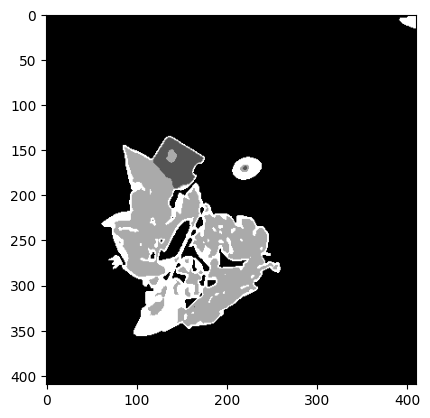

In [21]:
plt.figure()
plt.imshow(list(out2.values())[-1], cmap='grey')
plt.show()

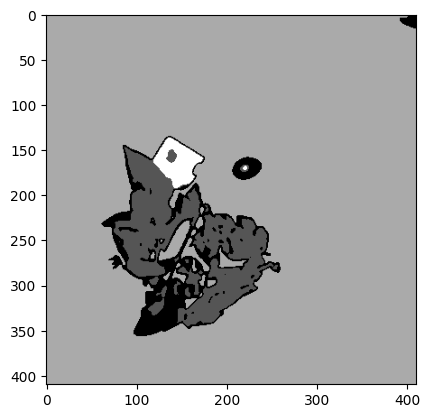

In [22]:
plt.figure()
plt.imshow(list(out2.values())[-2], cmap='grey')
plt.show()